Author: Shreyas Dungarwal

Problem statement  : Object Detection

In [20]:
import cv2 #pip install opncv-python
import matplotlib.pyplot as plt #pip install matplotlib

config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'


In [21]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [22]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #clclassLabels.append(fpt.read())

In [23]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [24]:
print(len(classLabels))

80


In [25]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) #255/2=127.5
model.setInputMean((127.5,127.5,127.5)) #mobilenet-> [-1,1]
model.setInputSwapRB(True)

<dnn_Model 000001A1C9FB5390>

#Read An Image

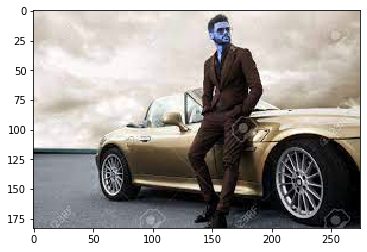

In [26]:
img = cv2.imread('man-car.jpg')
plt.imshow(img)

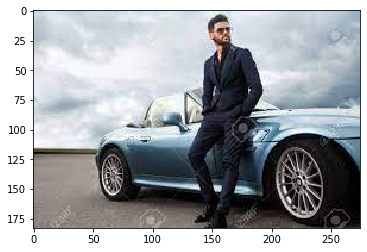

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)


In [29]:
print(ClassIndex)

[[1]
 [3]]


In [30]:
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    #cv2.rectangle((x,y), (255,0,0), 2)
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+20),font,fontScale = font_scale, color=(0,255,0), thickness=1 )

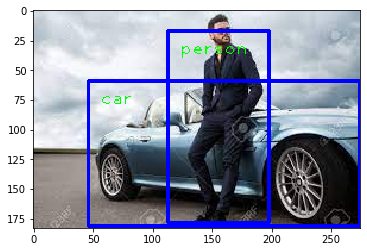

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [33]:
cap = cv2.VideoCapture(0)

#check if video is opened corectly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)
    print(ClassIndex)
    if (len(ClassIndex!=0)):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                #cv2.rectangle((x,y), (255,0,0), 2)
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+20),font,fontScale = font_scale, color=(0,255,0), thickness=1 )
    cv2.imshow("object detection", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [82]
 [77]]
[[ 1]
 [77]
 [82]]
[[ 1]
 [77]]
[[ 1]
 [82]
 [77]]
[[ 1]
 [82]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [77]]
[[ 1]
 [82]
 [77]]
[[ 1]
 [82]]
[[1]]
[[ 1]
 [77]]
[[1]]
[[ 1]
 [77]
 [82]]
[[ 1]
 [77]
 [82]]
[[ 1]
 [77]
 [82]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
